## Bluebike Demand Forecasting with LSTM

Steps involved: 
1. Extracting the data for MIT Mass Av Station
2. Aggregating for hourly trip count
3. Using the data from 01-01-2019 to 01-08-2021
4. Train test split
5. Implementing LSTM algorithm for train and test (unseen) data
6. Results





In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle

In [3]:
# Loading the data (All trip data)
trip_data = pd.read_pickle("/content/drive/MyDrive/blue_bikes_sales_prediction/data/raw_data.pkl")

In [4]:
trip_data.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
0,350,2017-01-01 00:06:58,2017-01-01 00:12:49,67,MIT at Mass Ave / Amherst St,42.3581,-71.093198,139,Dana Park,42.36178,-71.1081,644,Subscriber,NaN


In [5]:
# importing bike station data 
bike_stations = pd.read_csv("/content/drive/MyDrive/blue_bikes_sales_prediction/data/Hubway_Stations_as_of_July_2017.csv")
bike_stations.head(3)

,Number,Name,Latitude,Longitude,District,Public,Total docks
0,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18
1,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19
2,S32023,30 Dane St,42.381001,-71.104025,Somerville,Yes,15


In [121]:
# Extracting MIT Maas AV  station data 
# mit_data = pd.read_csv("/content/drive/MyDrive/blue_bikes_sales_prediction/data/MIT.csv")
# mit_data.shape
mit_data = trip_data[trip_data['start station name'] == "MIT at Mass Ave / Amherst St"]
mit_data.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
0,350,2017-01-01 00:06:58,2017-01-01 00:12:49,67,MIT at Mass Ave / Amherst St,42.3581,-71.093198,139,Dana Park,42.361780,-71.108100,644,Subscriber,NaN
6,260,2017-01-01 00:42:04,2017-01-01 00:46:25,67,MIT at Mass Ave / Amherst St,42.3581,-71.093198,179,MIT Vassar St,42.355601,-71.103945,1102,Subscriber,NaN
24,224,2017-01-01 03:00:00,2017-01-01 03:03:45,67,MIT at Mass Ave / Amherst St,42.3581,-71.093198,178,MIT Pacific St at Purrington St,42.359573,-71.101295,972,Subscriber,NaN


<Figure size 1440x432 with 0 Axes>

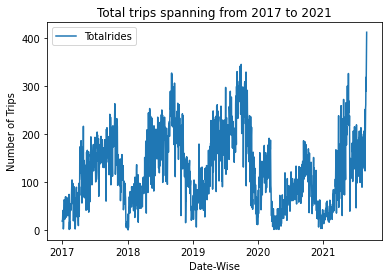

In [122]:
# plotting the trip data
plt.figure(figsize=(20,6))
df= pd.DataFrame(mit_data['starttime'].dt.date)
df = pd.DataFrame(df.groupby('starttime').size().reset_index(name='Totalrides'))
df.plot(x= 'starttime')
plt.xlabel('Date-Wise')
plt.ylabel('Number of Trips')
plt.title('Total trips spanning from 2017 to 2021')
plt.show()

In [123]:
# Extracting data from 2019 fro training and prediction
df = mit_data.copy()

df['year'] = df.starttime.dt.year
df['month'] = df.starttime.dt.month
df['date'] = df.starttime.dt.date
df['hour'] = df.starttime.dt.hour
df = pd.DataFrame(df.groupby(['year','month','date','hour']).size().reset_index(name='Totalrides'))
df = df[df.year>=2019].reset_index()
df

,index,year,month,date,hour,Totalrides
0,12860,2019,1,2019-01-01,10,3
1,12861,2019,1,2019-01-01,11,3
2,12862,2019,1,2019-01-01,12,3
3,12863,2019,1,2019-01-01,13,10
4,12864,2019,1,2019-01-01,14,2
...,...,...,...,...,...,...
16373,29233,2021,8,2021-08-31,19,39
16374,29234,2021,8,2021-08-31,20,33
16375,29235,2021,8,2021-08-31,21,41
16376,29236,2021,8,2021-08-31,22,46


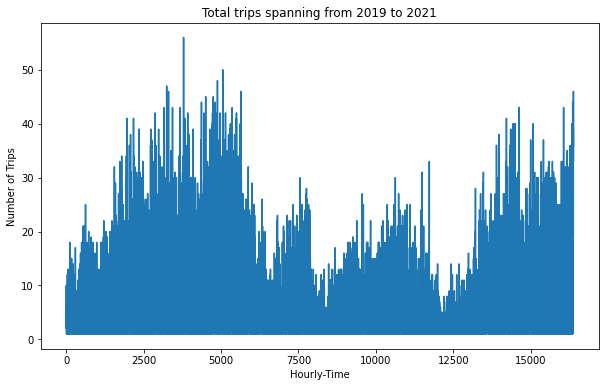

In [126]:
plt.figure(figsize=(10,6))
#df= pd.DataFrame(trip_data['starttime'].dt.date)

df = mit_data.copy()
# extracting the date,hour from time stamp
df['year'] = df.starttime.dt.year
df['month'] = df.starttime.dt.month
df['day'] = df.starttime.dt.day
df['hour'] = df.starttime.dt.hour
df = pd.DataFrame(df.groupby(['year','month','day','hour']).size().reset_index(name='Trips'))
df = df[df.year>=2019].reset_index()
df.Trips.plot()
# df.plot()
plt.xlabel('Hourly-Time')
plt.ylabel('Number of Trips')
plt.title('Total trips spanning from 2019 to 2021')
plt.show()

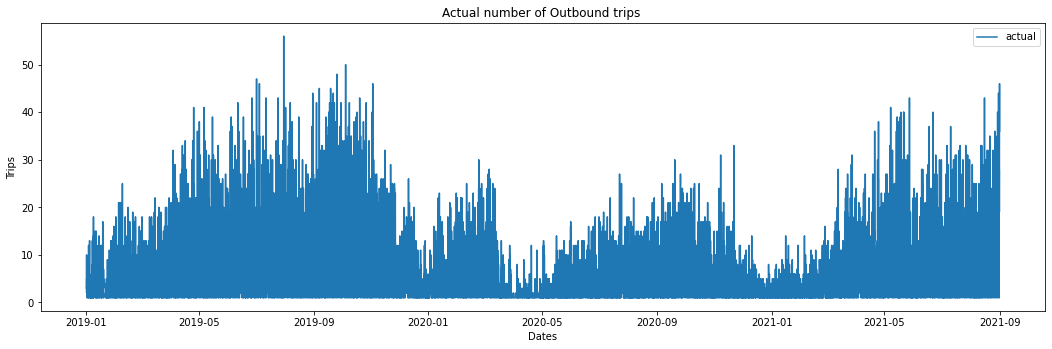

In [125]:
#Hourly plots from 2019
df['ds'] = pd.to_datetime(df[["year","month","day","hour"]])
df = df[['ds','Trips']]
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(311)
ax1.set_title('Actual number of Outbound trips ')
plt.plot(df.set_index('ds').Trips, label='actual')
#plt.plot(forecast[forecast.ds > '2021-06-01'].set_index('ds').yhat, 'r--', label='predicted')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Trips')
ax1.legend(loc='best')

## Training LSTM model and prediction

Epoch 1/50
14901/14901 - 39s - loss: 0.0080
Epoch 2/50
14901/14901 - 37s - loss: 0.0077
Epoch 3/50
14901/14901 - 37s - loss: 0.0077
Epoch 4/50
14901/14901 - 38s - loss: 0.0077
Epoch 5/50
14901/14901 - 37s - loss: 0.0077
Epoch 6/50
14901/14901 - 37s - loss: 0.0077
Epoch 7/50
14901/14901 - 37s - loss: 0.0077
Epoch 8/50
14901/14901 - 38s - loss: 0.0077
Epoch 9/50
14901/14901 - 37s - loss: 0.0077
Epoch 10/50
14901/14901 - 36s - loss: 0.0077
Epoch 11/50
14901/14901 - 37s - loss: 0.0077
Epoch 12/50
14901/14901 - 38s - loss: 0.0076
Epoch 13/50
14901/14901 - 37s - loss: 0.0076
Epoch 14/50
14901/14901 - 38s - loss: 0.0077
Epoch 15/50
14901/14901 - 37s - loss: 0.0076
Epoch 16/50
14901/14901 - 37s - loss: 0.0077
Epoch 17/50
14901/14901 - 37s - loss: 0.0076
Epoch 18/50
14901/14901 - 37s - loss: 0.0076
Epoch 19/50
14901/14901 - 37s - loss: 0.0076
Epoch 20/50
14901/14901 - 37s - loss: 0.0076
Epoch 21/50
14901/14901 - 38s - loss: 0.0076
Epoch 22/50
14901/14901 - 38s - loss: 0.0076
Epoch 23/50
14901/1

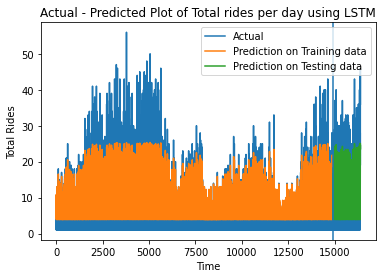

In [115]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
#dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
#dataset = dataframe.values
dataset = pd.DataFrame(df.Trips.values)
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.91)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1 #3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label = "Actual")
plt.plot(trainPredictPlot,label = "Prediction on Training data")
plt.plot(testPredictPlot,label = "Prediction on Testing data")
plt.axvline(x=train_size)
plt.xlabel('Time')
plt.ylabel('Total Rides')
plt.title("Actual - Predicted Plot of Total rides per day using LSTM")
plt.legend()
plt.show()

We see that RMSE is score is 6 for the unseen data, which is quite promising.<br>

Getting the data ready for plotting

In [117]:
train_pred = df[['ds','tr']]
train_pred = train_pred[0:train_size]
test_pred = df[['ds','ts']]
test_pred = test_pred[train_size:]


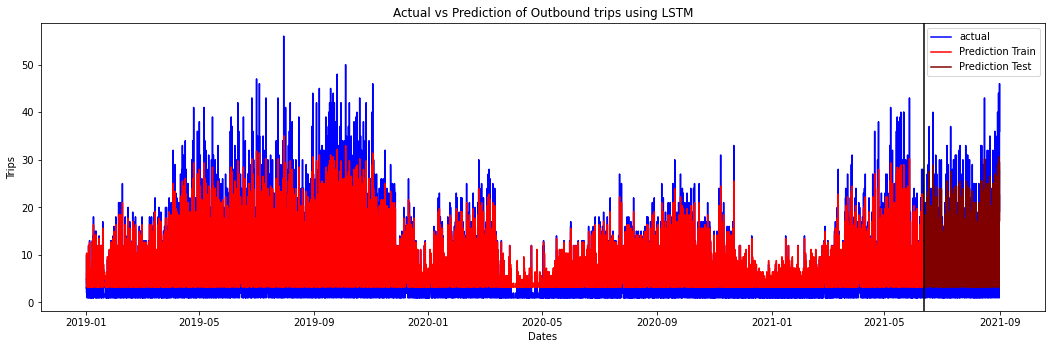

In [118]:
#plotting the actual and predicted values
# df['ds'] = pd.to_datetime(df[["year","month","day","hour"]])
# df = df[['ds','Trips']]
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(311)
ax1.set_title('Actual vs Prediction of Outbound trips using LSTM')
#plt.plot(scaler.inverse_transform(dataset), 'b-', label='actual') #actual
plt.plot(df.set_index('ds').Trips, 'b-', label='actual')
plt.plot(train_pred.set_index('ds').tr, 'r-', label='Prediction Train')
plt.plot(test_pred.set_index('ds').ts, '-', color = 'maroon',label='Prediction Test')
s = pd.to_datetime("06/12/2021")
plt.axvline( x = s,color = 'black')
#plt.plot(forecast[forecast.ds > '2021-06-01'].set_index('ds').yhat, 'r--', label='predicted')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Trips')
ax1.legend()

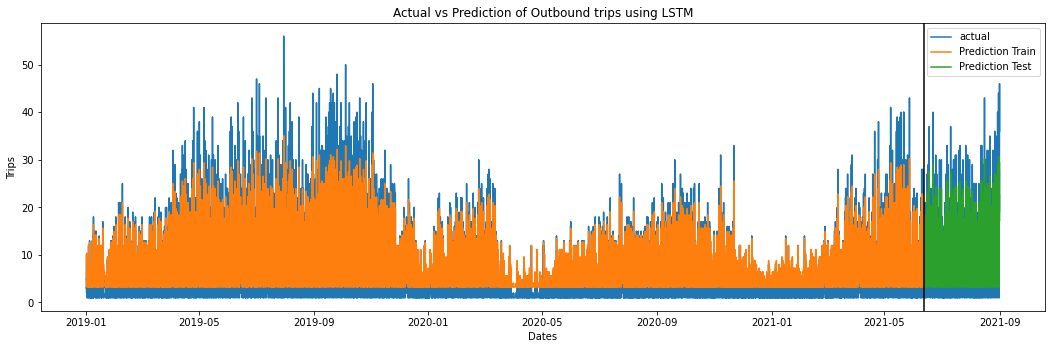

In [119]:
#plotting the actual and predicted values
# df['ds'] = pd.to_datetime(df[["year","month","day","hour"]])
# df = df[['ds','Trips']]
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(311)
ax1.set_title('Actual vs Prediction of Outbound trips using LSTM')
#plt.plot(scaler.inverse_transform(dataset), 'b-', label='actual') #actual
plt.plot(df.set_index('ds').Trips, label='actual')
plt.plot(train_pred.set_index('ds').tr, label='Prediction Train')
plt.plot(test_pred.set_index('ds').ts,label='Prediction Test')
s = pd.to_datetime("06/12/2021")
plt.axvline( x = s,color = 'black')
#plt.plot(forecast[forecast.ds > '2021-06-01'].set_index('ds').yhat, 'r--', label='predicted')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Trips')
ax1.legend()